In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
eps = 0.000001

import utils
input = utils.load_data([
    "../results/synthetic/1000/set4_aggregated/",
], "_x80_*")

data = utils.merge_exact(input, "exact_data_based")

Merge stuff

In [45]:
data['error_diff'] = np.sqrt(((data.pns_l_x - data.pns_l_y) ** 2 + (data.pns_u_x - data.pns_u_y) ** 2) / 2) / (data.pns_u_x - data.pns_l_x)

print(data.shape)
print(len(np.abs(data.pns_u_x - data.pns_l_x) > 0.00001))

data = data[np.abs(data.pns_u_x - data.pns_l_x) > 0.00001]

data_ps1_0 = data[data['index'] == 2] 
data_ps1_1 = data[data['index'] == 10]
data_ps1_x = data[data['index'] == 1]
data = data[(data['index'] > 2) & (data['index'] != 10) & (~data.identifiable) & (data.selector)]

data['ps1_disc'] = pd.cut(data.ps1, bins=5)
data_ps1_0['ps1_disc'] = pd.Interval(0,0)
data_ps1_1['ps1_disc'] = pd.Interval(1,1)

data = pd.concat((data_ps1_0, data, data_ps1_1))
#data['ps1_disc'] = data['ps1_disc'].astype(str)

(950, 196)
950


Sort columns by left bound of interval

In [46]:
cols = np.msort(np.array([[i.left, i] for i in data.ps1_disc.unique()]))[:,1]

# PNS RMSE against unbiased PGM bounds

In [47]:
data[["ps1_disc", "error_diff"]]

,ps1_disc,error_diff
2,"(0.0, 0.0]",0.697289
13,"(0.0, 0.0]",0.680744
24,"(0.0, 0.0]",0.681408
35,"(0.0, 0.0]",0.489692
46,"(0.0, 0.0]",0.524079
...,...,...
978,"(1.0, 1.0]",0.600838
989,"(1.0, 1.0]",0.505332
1000,"(1.0, 1.0]",0.118879
1011,"(1.0, 1.0]",0.560727


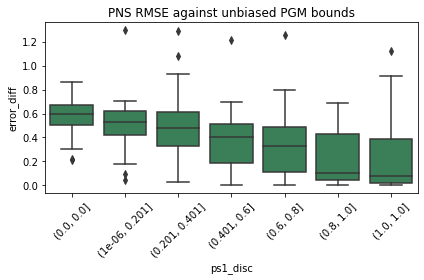

In [48]:
sns.boxplot(x="ps1_disc", y="error_diff", data=data, order=cols, color="seagreen")
plt.title("PNS RMSE against unbiased PGM bounds")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("plot_data/PNS_vs_PGM_by_ps1.png")
data[["ps1_disc", "error_diff"]].to_csv("plot_data/PNS_vs_PGM_by_ps1.csv")


In [207]:
data[["ps1_disc", "error_diff","markovianity"]].to_csv("PNS_vs_fulldataPGM.csv")

# PNS RMSE against unbiased PGM bounds by markovianity

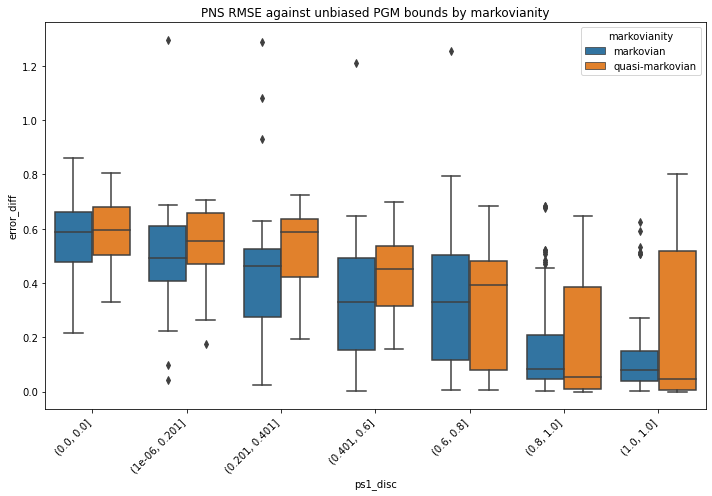

In [17]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x="ps1_disc", y="error_diff", hue="markovianity", data=data, order=cols)
ax.set_title(f"PNS RMSE against unbiased PGM bounds by markovianity")
    
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.savefig("plot_data/PNS_vs_PGM_by_ps1_markovianity.png")
data[["ps1_disc","markovianity", "error_diff"] ].to_csv("plot_data/PNS_vs_PGM_by_ps1_markovianity.csv")